# Project Report

## Introduction
In recent years, carbon capture and sequestration (CCS) has been recognized as a promising solution to mitigate climate change. This project focuses on the Pressure Swing Adsorption/Vacuum Swing Adsorption (PSA/VSA) process to capture CO2 from post-combustion power plant flue gas using Metal Organic Frameworks (MOFs) as sorbents.

## Methodology
The study utilizes optimized MOF structures (Mg-MOF-74, NOTT-300, UTSA-20, UTSA-80, ZIF-8) with calculated charges, employing simulation parameters such as Zeo++ volpo samples (10,000), number of Widom cycles (50,000), number of GCMC initialization cycles (500), number of GCMC production cycles (5,000), maximum distance between pressure points (0.6), and pressure range (0.2 to 10.2 bars) at 25°C.

In [1]:
import pyiast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler


## Question 1: Compute the density, accessible surface area (ASA), accessible probe-occupiable volume (POAV), and porosity

In [2]:

properties = {
    'Mg-MOF-74': {
        'density': 0.886275,         
        'ASA_m2_g': 1842.96,        
        'POAV_A3': 837.198,         
        'porosity': 0.61368         
    },
    'NOTT-300': {
        'density': 1.03926,
        'ASA_m2_g': 1648.23,
        'POAV_A3': 1297.11,
        'porosity': 0.48999
    },
    'UTSA-20': {
        'density': 0.882399,
        'ASA_m2_g': 3433.8,
        'POAV_A3': 3753.99,
        'porosity': 0.6605
    },
    'UTSA-80': {
        'density': 0.678215,
        'ASA_m2_g': 3188.86,
        'POAV_A3': 9619.78,
        'porosity': 0.66798
    },
    'ZIF-8': {
        'density': 0.909567,
        'ASA_m2_g': 1736.33,
        'POAV_A3': 2488.25,
        'porosity': 0.49906
    }
}


structures = ['Mg-MOF-74', 'NOTT-300', 'UTSA-20', 'ZIF-8', 'UTSA-80']
for struct in structures:
    print(f"{struct}: Density = {properties[struct]['density']} g/cm^3, "
          f"ASA = {properties[struct]['ASA_m2_g']} m^2/g, "
          f"POAV = {properties[struct]['POAV_A3']} Å^3, "
          f"Porosity = {properties[struct]['porosity']}")


Mg-MOF-74: Density = 0.886275 g/cm^3, ASA = 1842.96 m^2/g, POAV = 837.198 Å^3, Porosity = 0.61368
NOTT-300: Density = 1.03926 g/cm^3, ASA = 1648.23 m^2/g, POAV = 1297.11 Å^3, Porosity = 0.48999
UTSA-20: Density = 0.882399 g/cm^3, ASA = 3433.8 m^2/g, POAV = 3753.99 Å^3, Porosity = 0.6605
ZIF-8: Density = 0.909567 g/cm^3, ASA = 1736.33 m^2/g, POAV = 2488.25 Å^3, Porosity = 0.49906
UTSA-80: Density = 0.678215 g/cm^3, ASA = 3188.86 m^2/g, POAV = 9619.78 Å^3, Porosity = 0.66798


## Question 2: Compute the Henry coefficients for CO2 and N2 at 25°C, rank the structures based on their affinity for CO2

In [3]:

henry_CO2 = {
    'Mg-MOF-74': 8.62094e-05,
    'NOTT-300':  1.84624e-04,
    'UTSA-20':   4.08664e-05,
    'UTSA-80':   1.69318e-05,
    'ZIF-8':     8.82330e-06
}

henry_N2 = {
    'Mg-MOF-74': 3.336e-06,
    'NOTT-300':  1.053e-05,
    'UTSA-20':   4.370e-06,
    'UTSA-80':   3.352e-06,
    'ZIF-8':     None
}

selectivity_henry = {
    'Mg-MOF-74': 25.843696,
    'NOTT-300':  17.553815,
    'UTSA-20':    9.353291,
    'UTSA-80':    5.053168,
    'ZIF-8':      None
}


henry_CO2_ranking = sorted(henry_CO2.items(), key=lambda x: x[1], reverse=True)
print("Ranking based on CO2 Henry coefficients:", [x[0] for x in henry_CO2_ranking])

Ranking based on CO2 Henry coefficients: ['NOTT-300', 'Mg-MOF-74', 'UTSA-20', 'UTSA-80', 'ZIF-8']


## Question 3: Compute CO2 and N2 pure component isotherms at 25°C for the given structures, plot the pure isotherms

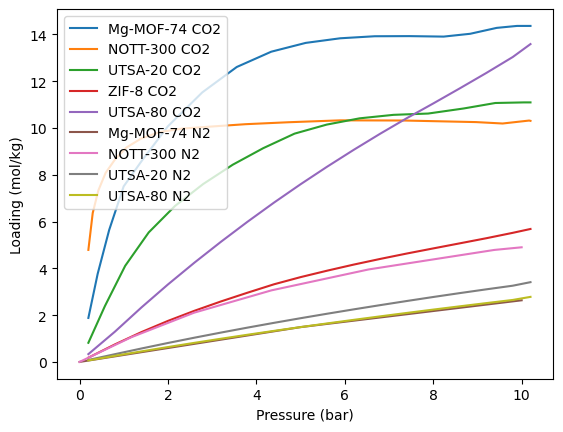

In [4]:

df_mg_co2 = pd.DataFrame({
    'pressure': [0.2, 0.41016887322, 0.67001455267, 0.998557991964, 1.42548282489, 1.99622666933, 2.77622666933, 3.55622666933, 4.33622666933, 5.11622666933, 5.89622666933, 6.67622666933, 7.45622666933, 8.23622666933, 8.83622666933, 9.43622666933, 9.8947179923, 10.2],
    'loading':  [1.88084144858, 3.76418933526, 5.63692777848, 7.50540871042, 8.64388096204, 10.0670216875, 11.5209328975, 12.6068881256, 13.2607054627, 13.6372233729, 13.834029179, 13.9212160302, 13.9267182437, 13.9062679196, 14.0265941157, 14.2791606725, 14.3625769924, 14.3625769924]
})

df_nott_co2 = pd.DataFrame({
    'pressure': [0.2, 0.298341206602, 0.426073284187, 0.589915212911, 0.798082547812, 1.06111190578, 1.3920153425, 1.8065701433, 2.32380398459, 2.96560310516, 3.7562122045, 4.72457592468, 5.90318904258, 7.32866093382, 8.96962266829, 9.56962266829, 10.1696226683, 10.2],
    'loading':  [4.78865587868, 6.36478521114, 7.33189809716, 8.08131036484, 8.64325429143, 9.16716124016, 9.54707741851, 9.822125509, 9.97521061242, 10.0598035617, 10.1619616815, 10.2452965139, 10.326598471, 10.3192459072, 10.2516963715, 10.19143855, 10.3176077649, 10.3046407646]
})

df_utsa20_co2 = pd.DataFrame({
    'pressure': [0.2, 0.574715560677, 1.03307839717, 1.56500998835, 2.15860358283, 2.79703231423, 3.46501117823, 4.15422553498, 4.86288696316, 5.59009119549, 6.33572539563, 7.10078686378, 7.88527559992, 8.69072742329, 9.40521026756, 10.0552102676, 10.2],
    'loading':  [0.818440971014, 2.39027740917, 4.1090249701, 5.53596397739, 6.66484045364, 7.60486904533, 8.42941341759, 9.13629376086, 9.75804221709, 10.1443615113, 10.412716124, 10.561451606, 10.6170519563, 10.8343310898, 11.0681820099, 11.0935777347, 11.0935777347]
})

df_zif_co2 = pd.DataFrame({
    'pressure': [0.2, 0.8, 1.4, 2.0, 2.6, 3.2, 3.8, 4.4, 5.0, 5.6, 6.2, 6.8, 7.4, 8.0, 8.6, 9.2, 9.8, 10.2],
    'loading':  [0.181009514091, 0.748276397366, 1.27513078988, 1.7536163501, 2.18661659722, 2.58623876389, 2.95953853488, 3.31913997407, 3.6249990661, 3.90023174025, 4.15997740729, 4.40256942449, 4.63268987694, 4.85200361933, 5.06882513551, 5.28727842042, 5.51871041245, 5.68318892905]
})

df_utsa80_co2 = pd.DataFrame({
    'pressure': [0.2, 0.8, 1.4, 2.0, 2.6, 3.2, 3.8, 4.4, 5.0, 5.6, 6.2, 6.8, 7.4, 8.0, 8.6, 9.2, 9.8, 10.2],
    'loading':  [0.333252387378, 1.29259728898, 2.32830385157, 3.31177092102, 4.24528135158, 5.13723667119, 5.99269090414, 6.8122429618, 7.59512314608, 8.34482940986, 9.06366160618, 9.75429446144, 10.4164392996, 11.0475614016, 11.6926980649, 12.3505128367, 13.0345613627, 13.5863992936]
})



# N2
df_mg_n2 = pd.DataFrame({
    'pressure': [0.001, 5.001, 10.0],
    'loading':  [0.000257510763413, 1.48815470176, 2.63476429432]
})

df_nott_n2 = pd.DataFrame({
    'pressure': [0.001, 1.17301740033, 2.59118045858, 4.33853140342, 6.53868466607, 9.38309444946, 10.0],
    'loading':  [0.000895316526601, 1.05724812486, 2.1042453782, 3.05828060678, 3.95332554059, 4.78752918818, 4.90024853544]
})

df_utsa20_n2 = pd.DataFrame({
    'pressure': [0.2, 0.8, 1.4, 2.0, 2.6, 3.2, 3.8, 4.4, 5.0, 5.6, 6.2, 6.8, 7.4, 8.0, 8.6, 9.2, 9.8, 10.2],
    'loading':  [0.0837032495792, 0.330980462265, 0.574160255198, 0.809842640495, 1.03665482175, 1.25506321894, 1.46683493432, 1.67109423847, 1.86870595622, 2.06027442856, 2.24631500151, 2.42727169201, 2.60353946241, 2.77549435653, 2.94171566539, 3.10286897659, 3.25880775778, 3.40951416063]
})

df_utsa80_n2 = pd.DataFrame({
    'pressure': [0.2, 0.8, 1.4, 2.0, 2.6, 3.2, 3.8, 4.4, 5.0, 5.6, 6.2, 6.8, 7.4, 8.0, 8.6, 9.2, 9.8, 10.2],
    'loading':  [0.0651577570402, 0.259619446545, 0.450153819187, 0.635666376971, 0.816011916432, 0.991298450249, 1.16170125829, 1.3273535891, 1.48844326603, 1.645253092, 1.79810844754, 1.9473202388, 2.09333442739, 2.236539986, 2.3763111058, 2.51409903358, 2.6494024344, 2.78088036623]
})

# ZIF N2 : pas d'isotherme exploitable dans le ZIP
df_zif_n2 = pd.DataFrame({'pressure': [], 'loading': []})


# Plot
plt.figure()
for name, df in [('Mg-MOF-74 CO2', df_mg_co2), ('NOTT-300 CO2', df_nott_co2), ('UTSA-20 CO2', df_utsa20_co2),
                 ('ZIF-8 CO2', df_zif_co2), ('UTSA-80 CO2', df_utsa80_co2), ('Mg-MOF-74 N2', df_mg_n2),
                 ('NOTT-300 N2', df_nott_n2), ('UTSA-20 N2', df_utsa20_n2), ('UTSA-80 N2', df_utsa80_n2)]:
    if len(df) > 0:
        plt.plot(df['pressure'], df['loading'], label=name)
plt.xlabel('Pressure (bar)')
plt.ylabel('Loading (mol/kg)')
plt.legend()
plt.show()


## Question 4: Calculate the CO2 working capacity (WC) for the different structures

In [11]:
P_ads = 1.0   # bar
P_des = 0.2   # bar
y_CO2 = 0.15
y_N2  = 0.85

# Mg-MOF-74
CO2iso_MG = pyiast.InterpolatorIsotherm(df_mg_co2, loading_key="loading", pressure_key="pressure",fill_value=df_mg_co2['loading'].iloc[-1])
N2iso_MG = pyiast.InterpolatorIsotherm(df_mg_n2, loading_key="loading", pressure_key="pressure",fill_value=df_mg_n2['loading'].iloc[-1])

q_ads_MG = pyiast.iast(partial_pressures=[P_ads*y_CO2, P_ads*y_N2], isotherms=[CO2iso_MG, N2iso_MG])[0]
q_des_MG = pyiast.iast(partial_pressures=[P_des*y_CO2, P_des*y_N2], isotherms=[CO2iso_MG, N2iso_MG])[0]
MG_WC = q_ads_MG - q_des_MG

# NOTT-300
CO2iso_NOTT= pyiast.InterpolatorIsotherm(df_nott_co2, loading_key="loading", pressure_key="pressure",fill_value=df_nott_co2['loading'].iloc[-1])
N2iso_NOTT= pyiast.InterpolatorIsotherm(df_nott_n2, loading_key="loading", pressure_key="pressure",fill_value=df_nott_n2['loading'].iloc[-1])

q_ads_NOTT = pyiast.iast(partial_pressures=[P_ads*y_CO2, P_ads*y_N2], isotherms=[CO2iso_NOTT, N2iso_NOTT])[0]
q_des_NOTT = pyiast.iast(partial_pressures=[P_des*y_CO2, P_des*y_N2], isotherms=[CO2iso_NOTT, N2iso_NOTT])[0]
NOTT_WC = q_ads_NOTT - q_des_NOTT

# UTSA-20
CO2iso_UTSA= pyiast.InterpolatorIsotherm(df_utsa20_co2, loading_key="loading", pressure_key="pressure",fill_value=df_utsa20_co2['loading'].iloc[-1])
N2iso_UTSA= pyiast.InterpolatorIsotherm(df_utsa20_n2, loading_key="loading", pressure_key="pressure",fill_value=df_utsa20_n2['loading'].iloc[-1])

q_ads_UTSA20 = pyiast.iast(partial_pressures=[P_ads*y_CO2, P_ads*y_N2], isotherms=[CO2iso_UTSA, N2iso_UTSA])[0]
q_des_UTSA20 = pyiast.iast(partial_pressures=[P_des*y_CO2, P_des*y_N2], isotherms=[CO2iso_UTSA, N2iso_UTSA])[0]
UTSA20_WC = q_ads_UTSA20 - q_des_UTSA20

# ZIF-8 (pas de N2: tu peux soit ignorer, soit mettre None/np.nan)
#if ZIF_N2_IT is not None:
CO2iso_ZIF= pyiast.InterpolatorIsotherm(df_zif_co2, loading_key="loading", pressure_key="pressure",fill_value=df_zif_co2['loading'].iloc[-1])
N2iso_ZIF= pyiast.InterpolatorIsotherm(df_zif_n2, loading_key="loading", pressure_key="pressure",fill_value=df_zif_n2['loading'].iloc[-1])

q_ads_ZIF = pyiast.iast(partial_pressures=[P_ads*y_CO2, P_ads*y_N2], isotherms=[CO2iso_ZIF, N2iso_ZIF])[0]
q_des_ZIF= pyiast.iast(partial_pressures=[P_des*y_CO2, P_des*y_N2], isotherms=[CO2iso_ZIF, N2iso_ZIF])[0]

ZIF_WC = q_ads_ZIF - q_des_ZIF
#else:
  #q_ads_ZIF = np.nan
#q_des_ZIF = np.nan
#ZIF_WC = np.nan

# UTSA-80
CO2iso_UTSA80= pyiast.InterpolatorIsotherm(df_utsa80_co2, loading_key="loading", pressure_key="pressure",fill_value=df_utsa80_co2['loading'].iloc[-1])
N2iso_UTSA80= pyiast.InterpolatorIsotherm(df_utsa80_n2, loading_key="loading", pressure_key="pressure",fill_value=df_utsa80_n2['loading'].iloc[-1])


q_ads_UTSA80 = pyiast.iast(partial_pressures=[P_ads*y_CO2, P_ads*y_N2], isotherms=[CO2iso_UTSA80, N2iso_UTSA80])[0]
q_des_UTSA80= pyiast.iast(partial_pressures=[P_des*y_CO2, P_des*y_N2], isotherms=[CO2iso_UTSA80, N2iso_UTSA80])[0]

UTSA80_WC = q_ads_UTSA80 - q_des_UTSA80

wc_values = {'Mg-MOF-74': MG_WC, 'NOTT-300': NOTT_WC, 'UTSA-20': UTSA20_WC, 'ZIF-8': ZIF_WC, 'UTSA-80': UTSA80_WC}
print("Working Capacities (mol/kg):", wc_values)


IndexError: single positional indexer is out-of-bounds

## Question 5: Calculate the CO2/N2 selectivity (S) for the different structures

In [ ]:
# Question 5: Calculate CO2/N2 selectivity
# Use fitted isotherms from Question 3
# Example selectivity as in example notebook: S_ads_MG = (q_ads_MG[0] / q_ads_MG[1]) * (y_N2 / y_CO2)
S_ads_MG = 'insert calculation using q_ads_MG from Question 4'
S_ads_NOTT = 'insert calculation using q_ads_NOTT from Question 4'
S_ads_UTSA20 = 'insert calculation using q_ads_UTSA20 from Question 4'
S_ads_ZIF = 'insert calculation using q_ads_ZIF from Question 4 (or inf if no N2)'
S_ads_UTSA80 = 'insert calculation using q_ads_UTSA80 from Question 4'

s_values = {'Mg-MOF-74': S_ads_MG, 'NOTT-300': S_ads_NOTT, 'UTSA-20': S_ads_UTSA20, 'ZIF-8': S_ads_ZIF, 'UTSA-80': S_ads_UTSA80}
print("Selectivities:", s_values)

## Question 6: Rank the structures using a WC vs. S plot

In [11]:
# Question 6: Rank structures using WC vs. S plot
# Use values from Questions 4 and 5
S_ads_tot = np.array([S_ads_MG, S_ads_NOTT, S_ads_UTSA20, S_ads_UTSA80, S_ads_ZIF])
WC_tot = np.array([MG_WC, NOTT_WC, UTSA20_WC, UTSA80_WC, ZIF_WC])

plt.scatter(S_ads_tot, WC_tot)
plt.text(S_ads_MG, MG_WC, "Mg-MOF-74", color="red", horizontalalignment='right')
plt.text(S_ads_NOTT, NOTT_WC, "NOTT-300", color="blue", horizontalalignment='right')
plt.text(S_ads_UTSA20, UTSA20_WC, "UTSA-20", color="green", horizontalalignment='left')
plt.text(S_ads_UTSA80, UTSA80_WC, "UTSA-80", color="cyan", horizontalalignment='left')
plt.text(S_ads_ZIF, ZIF_WC, "ZIF-8", color="black", horizontalalignment='left')

plt.xlabel("Selectivity")
plt.ylabel("Working Capacity (mol/kg)")
plt.show()

NameError: name 'S_ads_MG' is not defined

## Question 7: Is the screening model conclusive as to which material performs best in a PSA/VSA process for post-combustion CO2 capture? Discuss the level at which the screening was performed and come up with more complex key performance indicators

The screening model provides a preliminary ranking based on working capacity and selectivity, but it is not conclusive for determining the best material for PSA/VSA processes. The analysis is conducted at a basic level, using ideal adsorption isotherms and simplified conditions (25°C, fixed pressures). The lack of N2 adsorption data for ZIF-8 limits its selectivity assessment. More complex key performance indicators (KPIs) could include energy consumption during adsorption/desorption cycles, material stability under repeated use, cost-effectiveness, and kinetic performance. These factors should be integrated for a comprehensive evaluation.

## Question 8: Organization of the report
1. Introduction: Overview of CCS and PSA/VSA technology
2. Methodology: Simulation parameters and data analysis
3. Question 1: Density, ASA, POAV, porosity
4. Question 2: Henry coefficients and CO2 affinity ranking
5. Question 3: CO2 and N2 isotherms
6. Question 4: CO2 working capacity
7. Question 5: CO2/N2 selectivity
8. Question 6: WC vs. S ranking
9. Question 7: Discussion on screening model and advanced KPIs
10. Conclusion: Summary of findings